In [2]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [13]:
def feature_normalize(X):
    '''
    Returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    '''
    mean_r = []
    std_r = []

    X_norm = X

    n_c = X.shape[1]
    for i in range(n_c):
        m = np.mean(X[:, i])
        s = np.std(X[:, i])
        mean_r.append(m)
        std_r.append(s)
        X_norm[:, i] = (X_norm[:, i] - m) / s

    return X_norm, mean_r, std_r


def compute_cost(X, y, theta):
    '''
    Comput cost for linear regression
    '''
    #Number of training samples
    m = y.size
    predictions = X.dot(theta)
    sqErrors = (predictions - y)

    J = (1.0 / (2 * m)) * sqErrors.T.dot(sqErrors)
    return J


def gradient_descent(X, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta
    by taking num_items gradient steps with learning
    rate alpha
    '''
    m = y.size
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(theta)
        theta_size = theta.size

        for it in range(theta_size):
            temp = X[:, it]
            temp.shape = (m, 1)

            errors_x1 = (predictions - y) * temp
            theta[it][0] = theta[it][0] - alpha * (1.0 / m) * errors_x1.sum()

        J_history[i, 0] = compute_cost(X, y, theta)

    return theta, J_history

In [17]:
boston = load_boston()

x_data, mean_r, std_r = feature_normalize(boston.data)
x_data = np.insert(x_data, 0, 1, axis=1)
y_data = boston.target
y_data = y_data.reshape((y_data.size,1))

alpha = 0.00001

theta = np.ones(shape=(x_data.shape[1], 1))

theta, J_history = gradient_descent(x_data, y_data, theta, alpha, 100000)

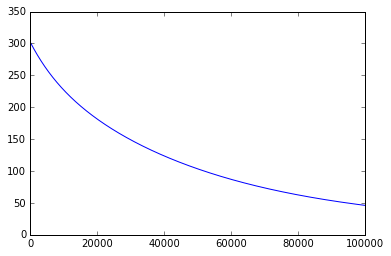

In [18]:
plt.plot(J_history)
plt.show()